# unstructured data
What Is Text Analysis?

Text analysis is the automated process of examining text by extracting and classifying data from your written data sources (emails, Facebook comments, survey responses, chat conversations, and more).

We start differentiating between objects, emotions, themes, distinguish tags,


In [1]:
import pandas as pd
import numpy as np
import re
import string 
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv(r'C:\Users\Chauhan\Downloads\consumer\consumer_complaints.csv', engine='python') #nrows=999,
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [3]:
df.shape # to get the understanding of data

(555957, 18)

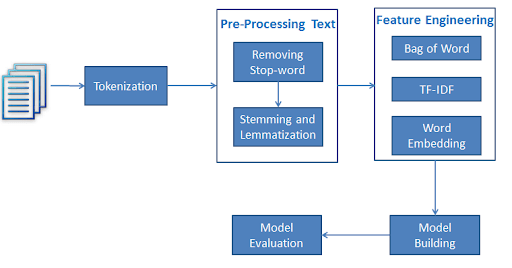

In [4]:
from PIL import Image

url = 'https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png'
import requests

Image.open(requests.get(url, stream=True).raw)

# Step- 1

In [5]:
df1 = df.loc[ 0: 1000, ['complaint_id',"date_received", 'issue', 'state', 'submitted_via']]
df1.head(2)

,complaint_id,date_received,issue,state,submitted_via
0,511074,8/30/2013,"Loan modification,collection,foreclosure",CA,Referral
1,511080,8/30/2013,Quick Baseline. Apply some variant of decision...,CA,Referral


# Step 2 :- Clean Data and Lower Case

# # Type of model you use: text classifiers or text extractors.
Text classifiers assign a category or tag to a piece of text based on its content. They are used for a wide variety of analysis such as <b> sentiment analysis, topic classification, urgency detection, intent categorization</b>.

Text Extractors identify and pulls data that is within the text. They are used for extracting the most relevant keywords or expressions from text, extracting names of people, brands or companies, prices, dates, etc. 


In [6]:
import nltk
#nltk.download()

# Sentiment Analysis
There are mainly two approaches for performing sentiment analysis.

Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

<b>Performing Sentiment Analysis using Text Classification using 2nd Approach<b>

In [7]:
df1.submitted_via.value_counts()

Web            692
Postal mail    107
Referral        92
Phone           90
Fax             19
Email            1
Name: submitted_via, dtype: int64

In [8]:
#It shows state value is avaible in 7869 rows and 249 empty rows for submitted_via = Fax is having 
df1.groupby('submitted_via').count()

,complaint_id,date_received,issue,state
submitted_via,,,,
Email,1,1,1,1
Fax,19,19,19,19
Phone,90,90,90,89
Postal mail,107,107,107,107
Referral,92,92,92,92
Web,692,692,692,690


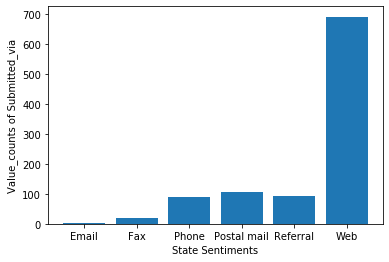

In [9]:
Sentiment_count=df1.groupby('submitted_via').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['state'])
plt.xlabel('State Sentiments')
plt.ylabel('Value_counts of Submitted_via')
plt.show()

In [10]:
#function removed capitalization and punctuation. (We’re not doing any complicated syntactic analysis, so we don’t need to preserve the sentence structure or capitalization).

In [11]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)
    

In [12]:
clean_text('Loan modification,collection,foreclosure')
df1['tokenized'] = df1['issue'].map(lambda x: clean_text(x))

# Step -3 Tokenize

# Tokenize and calculate execution time

In [13]:
import time
start = time.time()
df1['tokenized'] = df1['tokenized'].map(lambda x: nltk.word_tokenize(x))
print("The total applied time is", (time.time() - start))

The total applied time is 0.16200947761535645


In [14]:
df1.head(2)

,complaint_id,date_received,issue,state,submitted_via,tokenized
0,511074,8/30/2013,"Loan modification,collection,foreclosure",CA,Referral,"[loan, modificationcollectionforeclosure]"
1,511080,8/30/2013,Quick Baseline. Apply some variant of decision...,CA,Referral,"[quick, baseline, apply, some, variant, of, de..."


# Step 4 - Stopwords 

In [15]:
from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [16]:
"""text1 = 'improper contact or sharing of info'
split_str = text1.split()
filtered_str = ' '.join((filter(lambda s: s not in stopwords.words('english'), split_str)))
print("Filtered seq. is as follows: ", filtered_str)"""

'text1 = \'improper contact or sharing of info\'\nsplit_str = text1.split()\nfiltered_str = \' \'.join((filter(lambda s: s not in stopwords.words(\'english\'), split_str)))\nprint("Filtered seq. is as follows: ", filtered_str)'

In [17]:
def stopwords_text(full_str):
    #split_str = full_str.split()
    filtered_str = ' '.join((filter(lambda s: s not in stopwords.words('english'), full_str)))
    return filtered_str

In [18]:
df1['filtered'] = df1['tokenized'].map(lambda x: stopwords_text(x))
df1.head(2)

,complaint_id,date_received,issue,state,submitted_via,tokenized,filtered
0,511074,8/30/2013,"Loan modification,collection,foreclosure",CA,Referral,"[loan, modificationcollectionforeclosure]",loan modificationcollectionforeclosure
1,511080,8/30/2013,Quick Baseline. Apply some variant of decision...,CA,Referral,"[quick, baseline, apply, some, variant, of, de...",quick baseline apply variant decision treewith...


# Step 5- Tokenize filtered data

In [19]:
df1['tokenized'] = df1['filtered'].map(lambda x: nltk.word_tokenize(x))
df1.head(2)

,complaint_id,date_received,issue,state,submitted_via,tokenized,filtered
0,511074,8/30/2013,"Loan modification,collection,foreclosure",CA,Referral,"[loan, modificationcollectionforeclosure]",loan modificationcollectionforeclosure
1,511080,8/30/2013,Quick Baseline. Apply some variant of decision...,CA,Referral,"[quick, baseline, apply, variant, decision, tr...",quick baseline apply variant decision treewith...


# Step 6 Stemming and Lemmatization

# Lexicon Normalization
#It reduces derivationally related forms of a word to a common root word.
# Stemming 
#Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.
# Lemmatization
#It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context.
#For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

def lemmatiz(str):
    strng = list()
    for i in str.split():
        strng.append(lem.lemmatize(i,"v"))
    return strng


def stemetiz(str):
    strng = list()
    for i in str.split():
        strng.append(stem.stem(i))
    return strng

In [21]:
df1['lemmatizer'] = df1['filtered'].map(lambda x: lemmatiz(x))

In [22]:
df1['stemmer'] = df1['filtered'].map(lambda x: stemetiz(x))
#word = "repaying loan"; print("Lemmatized Word:",lem.lemmatize(word,"v")); print("Stemmed Word:",stem.stem(word))

In [23]:
df1.head(2)

,complaint_id,date_received,issue,state,submitted_via,tokenized,filtered,lemmatizer,stemmer
0,511074,8/30/2013,"Loan modification,collection,foreclosure",CA,Referral,"[loan, modificationcollectionforeclosure]",loan modificationcollectionforeclosure,"[loan, modificationcollectionforeclosure]","[loan, modificationcollectionforeclosur]"
1,511080,8/30/2013,Quick Baseline. Apply some variant of decision...,CA,Referral,"[quick, baseline, apply, variant, decision, tr...",quick baseline apply variant decision treewith...,"[quick, baseline, apply, variant, decision, tr...","[quick, baselin, appli, variant, decis, treewi..."


# Step No -7  Bag of Words

# Feature Generation using Bag of Words
Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document.

# Text Analysis: Testing Our Hypothesis
#we're going to use regex, or regular expressions.

In [24]:
cc_wds=['loan','closure', 'quick']
def comp_bool(x):
    substr = pd.Series(x)
    return any(substr.isin(cc_wds))


In [25]:
df1['status']= df1['lemmatizer'].map(lambda x: comp_bool(x))

D:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df1.head()

,complaint_id,date_received,issue,state,submitted_via,tokenized,filtered,lemmatizer,stemmer,status
0,511074,8/30/2013,"Loan modification,collection,foreclosure",CA,Referral,"[loan, modificationcollectionforeclosure]",loan modificationcollectionforeclosure,"[loan, modificationcollectionforeclosure]","[loan, modificationcollectionforeclosur]",True
1,511080,8/30/2013,Quick Baseline. Apply some variant of decision...,CA,Referral,"[quick, baseline, apply, variant, decision, tr...",quick baseline apply variant decision treewith...,"[quick, baseline, apply, variant, decision, tr...","[quick, baselin, appli, variant, decis, treewi...",True
2,510473,8/30/2013,Incorrect information on credit report,NY,Postal mail,"[incorrect, information, credit, report]",incorrect information credit report,"[incorrect, information, credit, report]","[incorrect, inform, credit, report]",False
3,510326,8/30/2013,Repaying your loan,MD,Email,"[repaying, loan]",repaying loan,"[repay, loan]","[repay, loan]",True
4,511067,8/30/2013,False statements or representation,GA,Web,"[false, statements, representation]",false statements representation,"[false, statements, representation]","[fals, statement, represent]",False


In [27]:
df1.to_csv('future_emi_ptp_final.csv')

# How to Use Text Analysis with Python
You might opt for open source libraries, such as <b>Scikit-learn or NLTK</b>, for example. Some other libraries include <b>SpaCy</b> (its API is simple and productive), <b>Keras (a machine learning library with a focus on enabling fast experimentation), TensorFlow (for using deep learning for analyzing text), or PyTorch <b/>(another library used for building deep neural networks for NLP). 

# https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

NLTK is a powerful Python package that provides a set of diverse natural languages algorithms. NLTK consists of the most common algorithms such as <b>tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition</b>.

<b>NLP enables the computer to interact with humans in a natural manner </b>. It helps the computer to understand the human language and derive meaning from it. NLP is applicable in several problematic from speech recognition, language translation, classifying documents to information extraction. Analyzing movie review is one of the classic examples to demonstrate a simple NLP Bag-of-words model, on movie reviews.

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv("future_emi_ptp_final.csv", header=0)
docs = list(data.lemmatizer)
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)
df.to_csv('future_emi_ptp_final_vec.csv')

      account  action  advertise  amount  application  apply  apr  atm  \
0           0       0          0       0            0      0    0    0   
1           0       0          0       0            0      1    0    0   
2           0       0          0       0            0      0    0    0   
3           0       0          0       0            0      0    0    0   
4           0       0          0       0            0      0    0    0   
...       ...     ...        ...     ...          ...    ...  ...  ...   
996         1       0          0       0            0      0    0    0   
997         0       0          0       0            1      0    0    0   
998         0       0          0       0            0      0    0    0   
999         0       0          0       0            0      0    0    0   
1000        0       0          0       0            0      0    0    0   

      attempt  available  ...  unable  underwrite  unsolicited  use  value  \
0           0          0  ...    

In [34]:
## install wordcloud
# !pip install wordcloud 

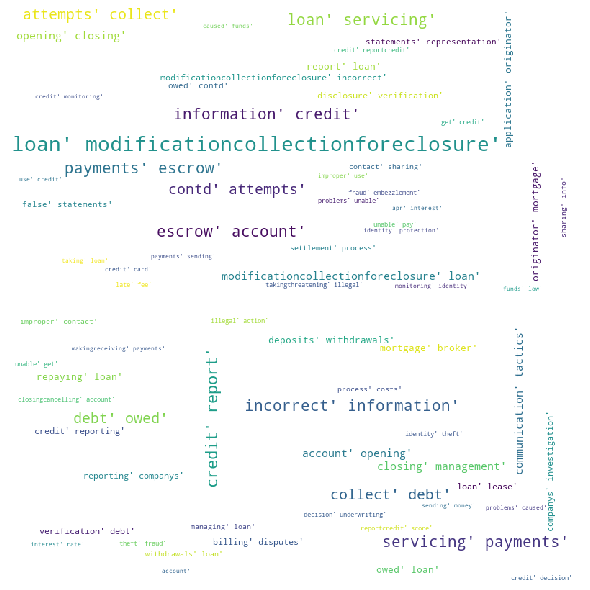

In [40]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Reads '.csv ' file  
df = pd.read_csv(r"future_emi_ptp_final.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.tokenized: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 